In [ ]:
# IMPORTAR LIBRERIA
import pandas as pd
df = pd.read_excel("Trabajo2.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9686 entries, 0 to 9685
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   eess_renaes                   9680 non-null   float64       
 1   eess_diresa                   9680 non-null   object        
 2   eess_red                      9680 non-null   object        
 3   eess_nombre                   9680 non-null   object        
 4   id_eess                       9680 non-null   float64       
 5   id_persona                    9680 non-null   float64       
 6   edad                          9680 non-null   float64       
 7   Peso                          9680 non-null   float64       
 8   Altura                        9680 non-null   float64       
 9   sexo                          9680 non-null   object        
 10  fecha_ingreso_hosp            9680 non-null   datetime64[ns]
 11  flag_uci                      

In [ ]:
# LIMPIEZA DE DATOS
df = df[["id_persona","eess_diresa","eess_nombre","edad","Peso","Altura","sexo","fecha_ingreso_hosp","flag_uci"]]
# eliminar datos vacios
df = df.dropna()
# eliminar datos duplicados
df = df.drop_duplicates(subset=['id_persona'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9387 entries, 0 to 9573
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id_persona          9387 non-null   float64       
 1   eess_diresa         9387 non-null   object        
 2   eess_nombre         9387 non-null   object        
 3   edad                9387 non-null   float64       
 4   Peso                9387 non-null   float64       
 5   Altura              9387 non-null   float64       
 6   sexo                9387 non-null   object        
 7   fecha_ingreso_hosp  9387 non-null   datetime64[ns]
 8   flag_uci            9387 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 733.4+ KB


In [ ]:
# Medidas estadisticas
df[["edad","Peso","Altura"]].describe()

,edad,Peso,Altura
count,9387.000000,9387.000000,9387.000000
mean,62.600511,74.724193,170.038564
std,13.657846,14.840580,11.829602
min,11.000000,50.000000,150.000000
25%,53.000000,62.000000,160.000000
50%,62.000000,75.000000,170.000000
75%,72.000000,88.000000,180.000000
max,103.000000,100.000000,190.000000


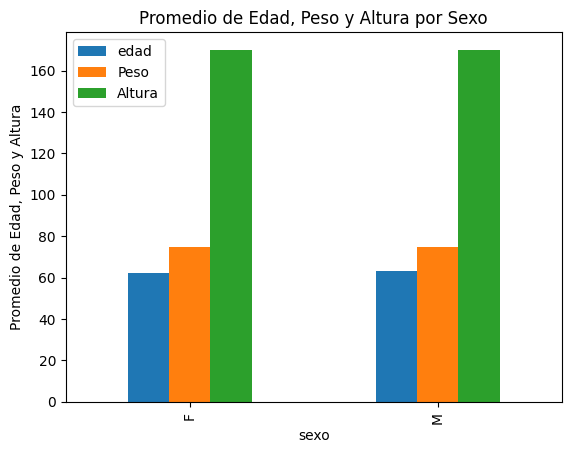

In [ ]:
# importar matplotib
import matplotlib.pyplot as plt

# FILTRAR DATOS PARA GRAFICOS

data_for_plot = df[["edad","Peso","Altura","sexo"]].groupby(["sexo"]).mean()

# Crear el gráfico
data_for_plot.plot(kind='bar')

# Agregar etiquetas y título
plt.xlabel("sexo")
plt.ylabel("Promedio de Edad, Peso y Altura")
plt.title("Promedio de Edad, Peso y Altura por Sexo")

# Mostrar el gráfico
plt.show()


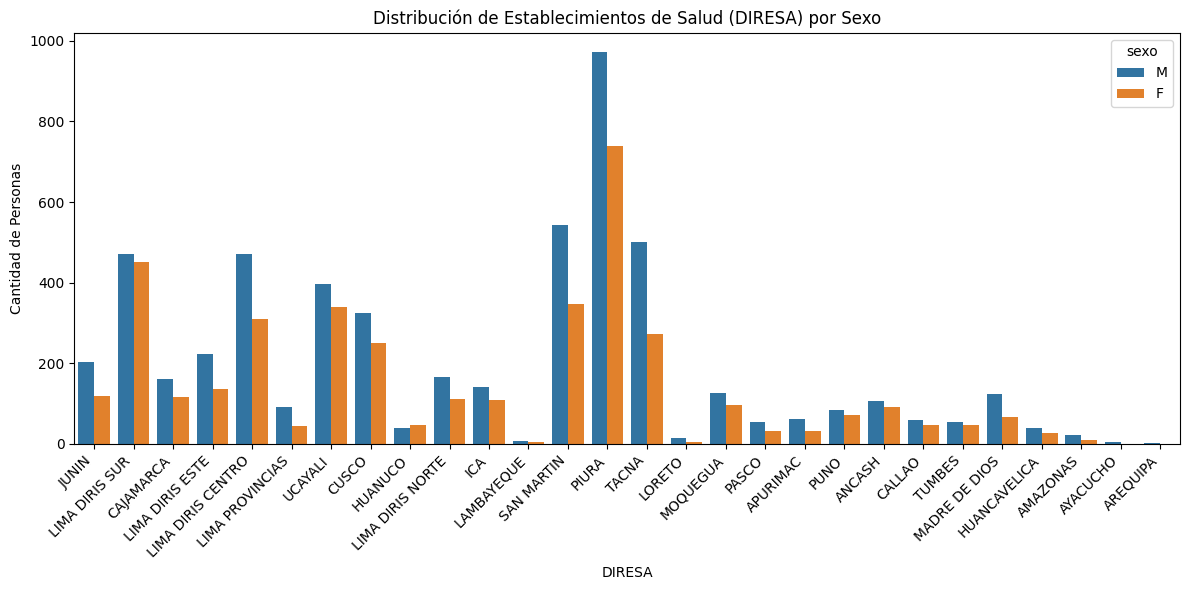

<ipython-input-30-c8478e27a999>:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout() # Ajusta el diseño para evitar que las etiquetas se superpongan


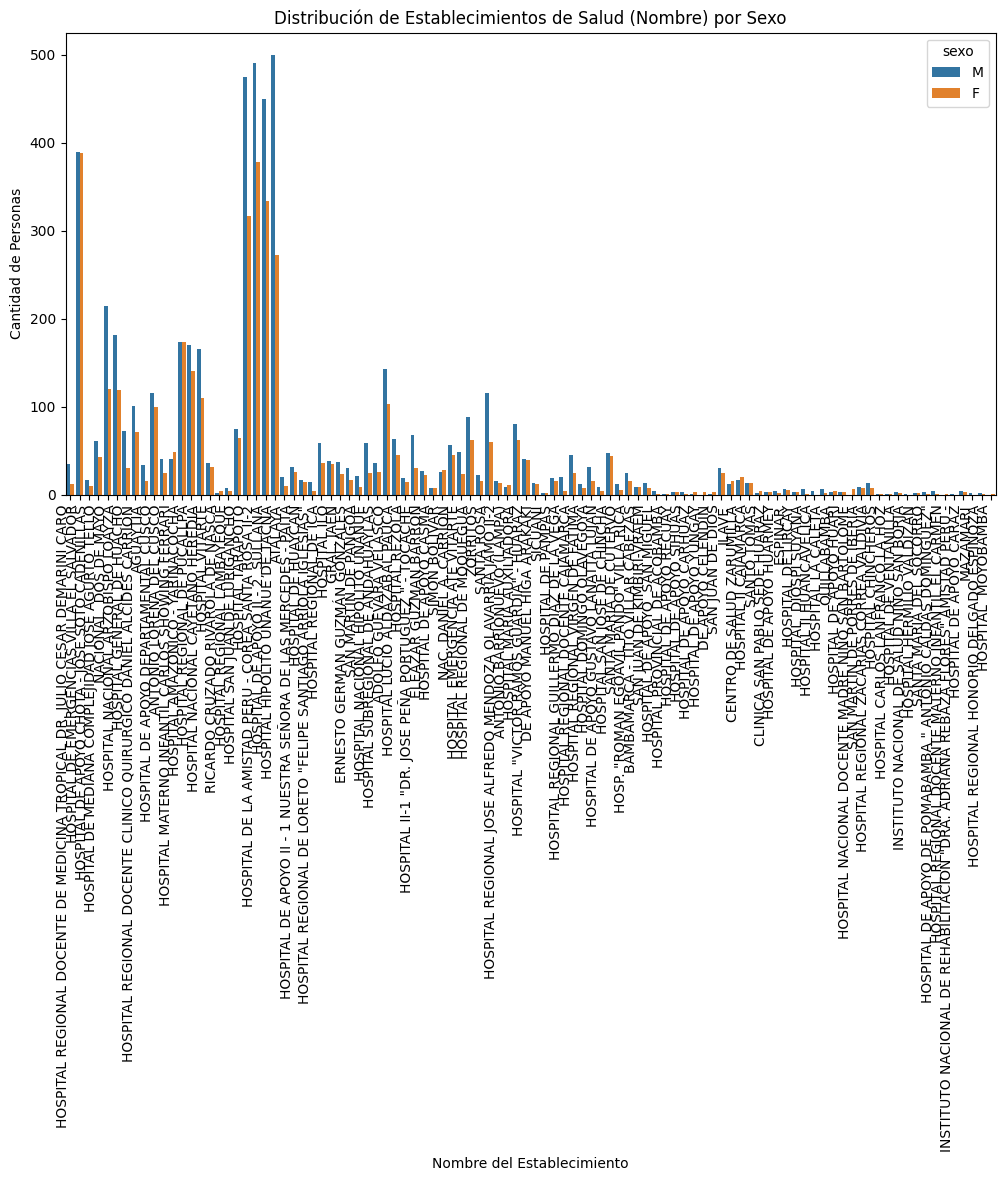

In [ ]:
# prompt: que otro grafico recomiendas realizar para "eess_diresa","eess_nombre" y que se filtre por "sexo", comentarios en español

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (código anterior) ...

# Gráfico de barras agrupadas para visualizar la distribución de 'eess_diresa' y 'eess_nombre' por sexo
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura según sea necesario
sns.countplot(x="eess_diresa", hue="sexo", data=df)
plt.xticks(rotation=45, ha='right')  # Rota las etiquetas del eje x para mayor legibilidad
plt.title("Distribución de Establecimientos de Salud (DIRESA) por Sexo")
plt.xlabel("DIRESA")
plt.ylabel("Cantidad de Personas")
plt.tight_layout() # Ajusta el diseño para evitar que las etiquetas se superpongan
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x="eess_nombre", hue="sexo", data=df)
plt.xticks(rotation=90, ha='right') # Rotación de etiquetas del eje x
plt.title("Distribución de Establecimientos de Salud (Nombre) por Sexo")
plt.xlabel("Nombre del Establecimiento")
plt.ylabel("Cantidad de Personas")
plt.tight_layout() # Ajusta el diseño para evitar que las etiquetas se superpongan
plt.show()


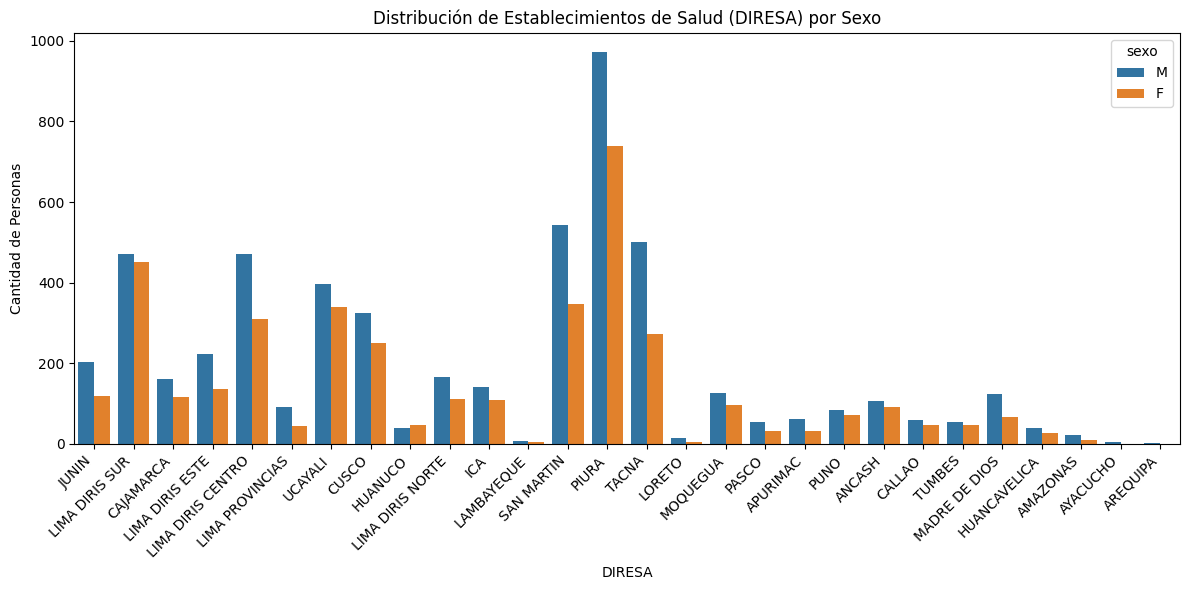

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns





# Gráfico de barras agrupadas para visualizar la distribución de 'eess_diresa' y 'eess_nombre' por sexo

plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura según sea necesario

sns.countplot(x="eess_diresa", hue="sexo", data=df)

plt.xticks(rotation=45, ha='right')  # Rota las etiquetas del eje x para mayor legibilidad

plt.title("Distribución de Establecimientos de Salud (DIRESA) por Sexo")

plt.xlabel("DIRESA")

plt.ylabel("Cantidad de Personas")

plt.tight_layout() # Ajusta el diseño para evitar que las etiquetas se superpongan

plt.show()

<ipython-input-32-aa4b85c8a372>:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout() # Ajusta el diseño para evitar que las etiquetas se superpongan


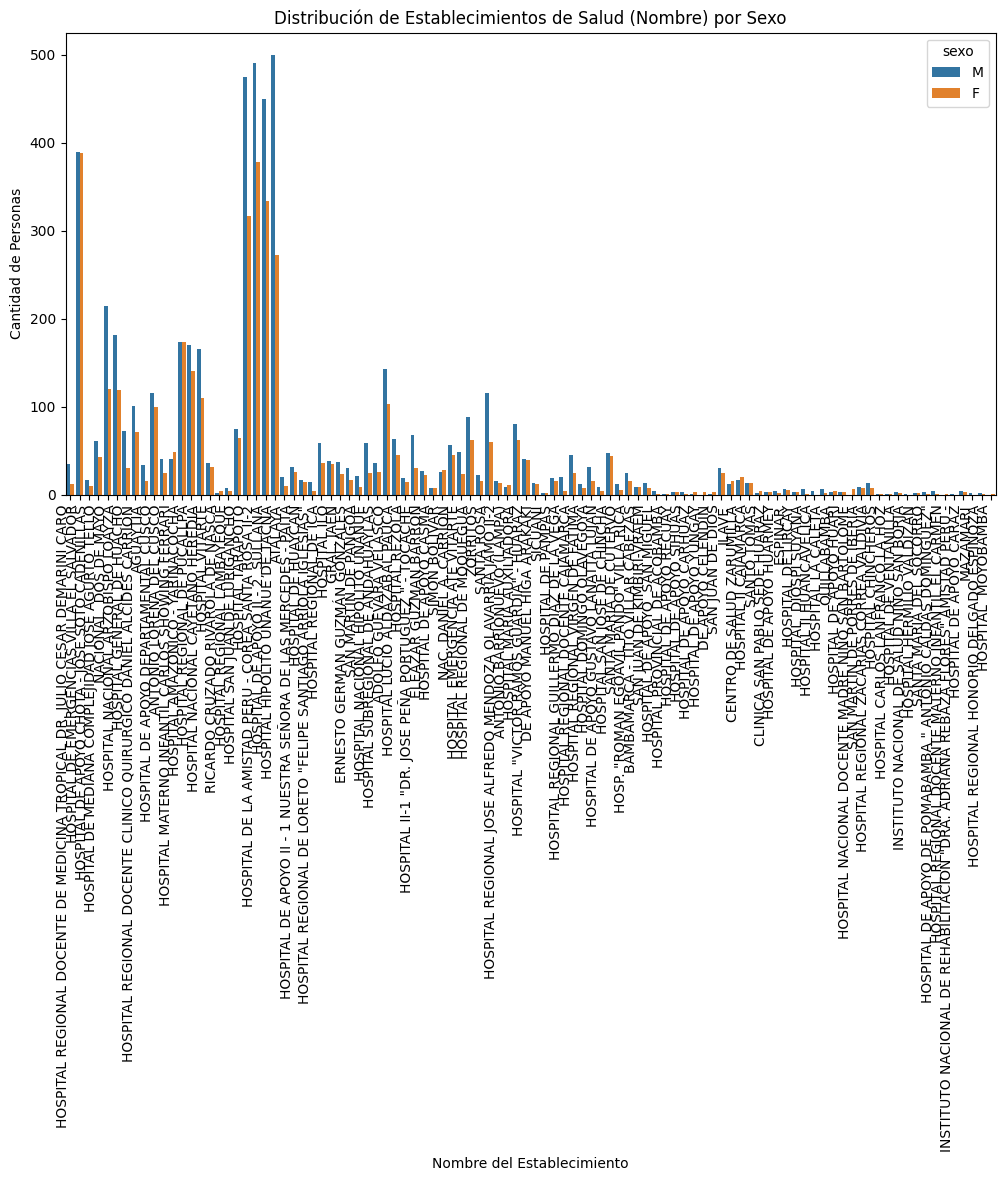

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x="eess_nombre", hue="sexo", data=df)
plt.xticks(rotation=90, ha='right') # Rotación de etiquetas del eje x
plt.title("Distribución de Establecimientos de Salud (Nombre) por Sexo")
plt.xlabel("Nombre del Establecimiento")
plt.ylabel("Cantidad de Personas")
plt.tight_layout() # Ajusta el diseño para evitar que las etiquetas se superpongan
plt.show()

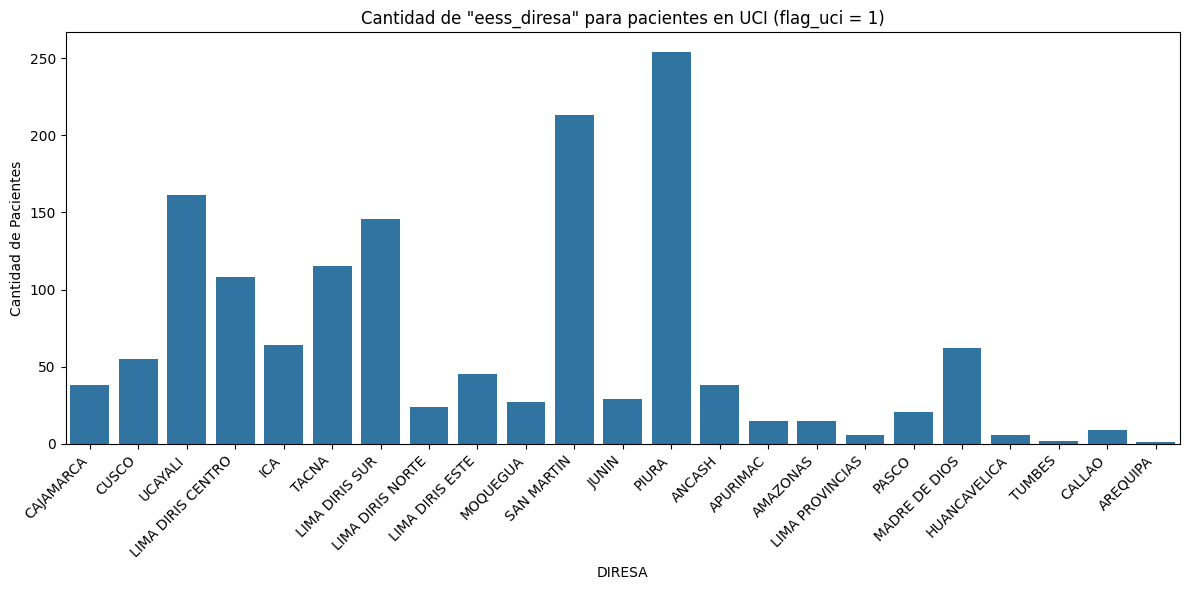

In [ ]:
# prompt: grafico para visualizar la cantidad de "eess_diresa" por "flag_uci"=1, comentarios en español

import matplotlib.pyplot as plt
# Filtrar datos donde 'flag_uci' es igual a 1
df_uci = df[df['flag_uci'] == 1]

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(x='eess_diresa', data=df_uci)
plt.xticks(rotation=45, ha='right')
plt.title('Cantidad de "eess_diresa" para pacientes en UCI (flag_uci = 1)')
plt.xlabel('DIRESA')
plt.ylabel('Cantidad de Pacientes')
plt.tight_layout()
plt.show()
